In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

In [3]:
df = pd.read_csv("houseprice.csv", index_col="Id")

df.shape

(1460, 80)

In [3]:
# No data is missing
missing_df = df.isna().mean()

missing_df[missing_df > 0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
df["MSSubClass"].nunique()

15

In [6]:
df["MSSubClass"].isna().mean()

0.0

<Axes: >

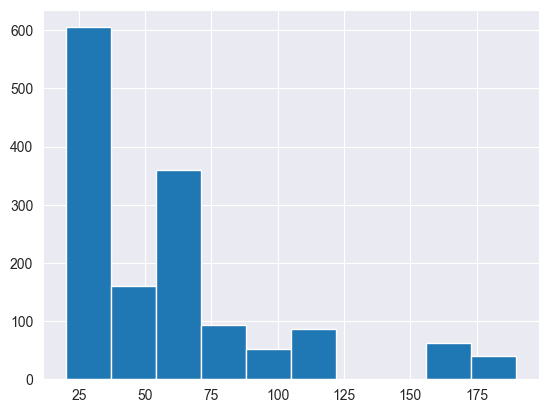

In [7]:
df["MSSubClass"].hist()

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

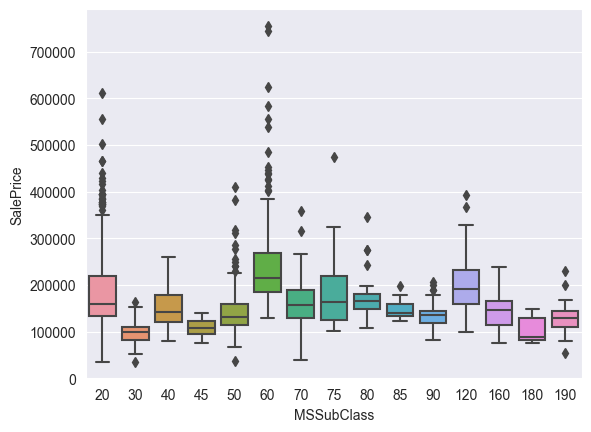

In [8]:
sns.boxplot(df, x="MSSubClass", y="SalePrice")

In [9]:
df["MSZoning"].nunique()

5

In [10]:
df["MSZoning"].isna().mean()

0.0

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

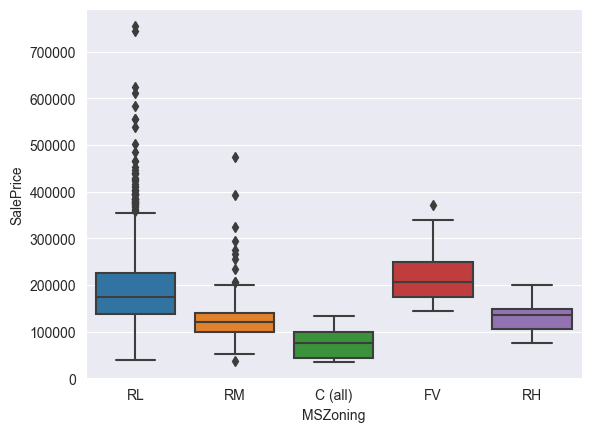

In [11]:
sns.boxplot(df, x="MSZoning", y="SalePrice")

In [12]:
df["LotFrontage"].nunique()

110

In [13]:
df["LotFrontage"].isna().mean()

0.1773972602739726

<Axes: xlabel='LotFrontage', ylabel='Count'>

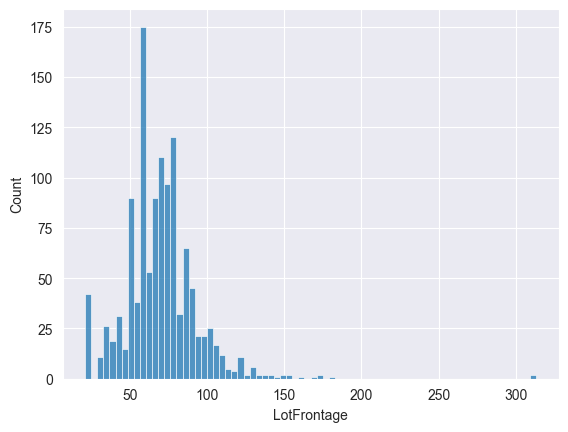

In [14]:
sns.histplot(df["LotFrontage"])

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

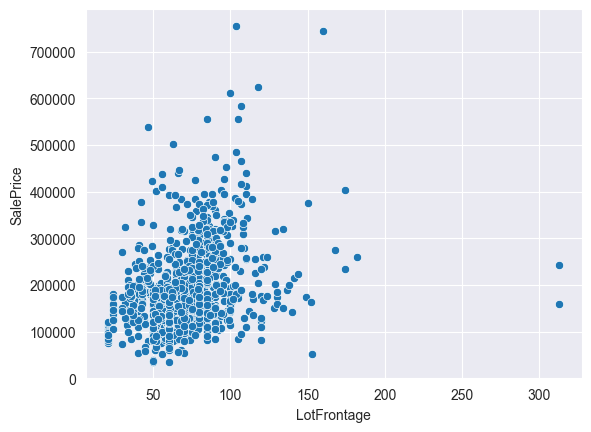

In [15]:
sns.scatterplot(df, x="LotFrontage", y="SalePrice")

In [16]:
df["LotArea"].nunique()

1073

In [17]:
df["LotArea"].isna().mean()

0.0

<Axes: xlabel='LotArea', ylabel='Count'>

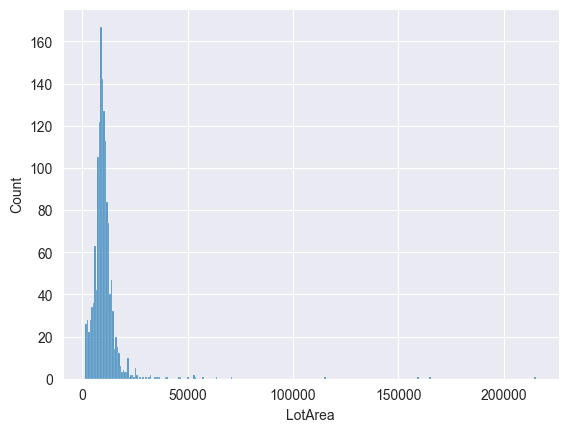

In [18]:
sns.histplot(df, x="LotArea")

<Axes: xlabel='LotArea', ylabel='SalePrice'>

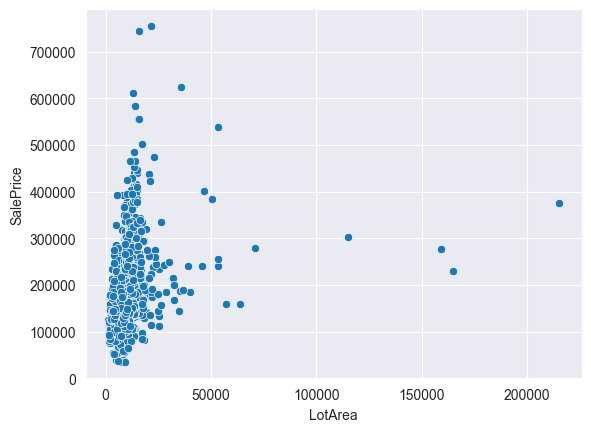

In [19]:
sns.scatterplot(df, x="LotArea", y="SalePrice")

In [20]:
df["Street"].nunique(dropna=False)

2

In [21]:
df["Street"].isna().mean()

0.0

In [22]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

<Axes: xlabel='Street', ylabel='SalePrice'>

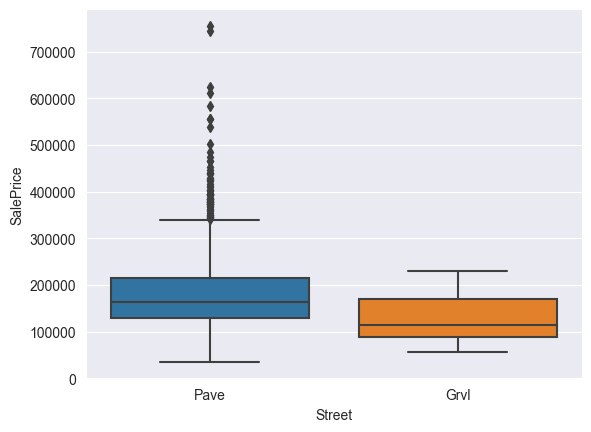

In [23]:
sns.boxplot(df, x="Street", y="SalePrice")

In [24]:
df["Alley"].nunique()

2

In [25]:
df["Alley"].isna().mean()

0.9376712328767123

In [26]:
df["Alley"].value_counts(dropna=False)

Alley
NaN     1369
Grvl      50
Pave      41
Name: count, dtype: int64

<Axes: xlabel='Alley', ylabel='SalePrice'>

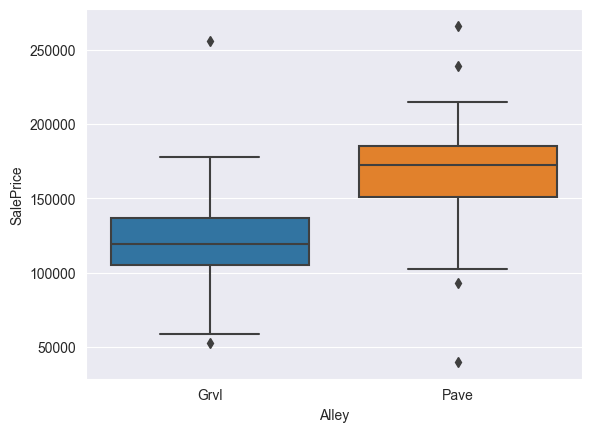

In [27]:
sns.boxplot(df, x="Alley", y="SalePrice")

In [28]:
df["LotShape"].nunique()

4

In [29]:
df["LotShape"].value_counts(dropna=False, normalize=True)

LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64

<Axes: xlabel='LotShape', ylabel='SalePrice'>

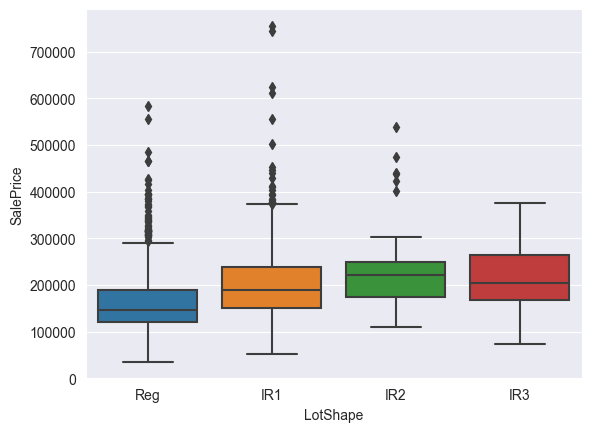

In [30]:
sns.boxplot(df, x="LotShape", y="SalePrice")

In [31]:
df["LandContour"].nunique()

4

In [32]:
df["LandContour"].value_counts(dropna=False, normalize=True)

LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64

<Axes: xlabel='LandContour', ylabel='SalePrice'>

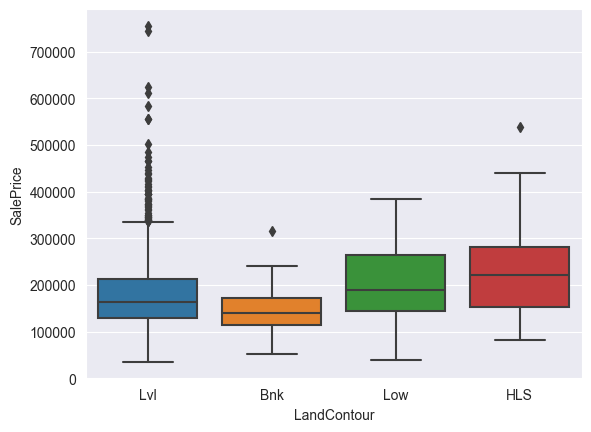

In [33]:
sns.boxplot(df, x="LandContour", y="SalePrice")

In [34]:
df["Utilities"].nunique()

2

In [35]:
df["Utilities"].value_counts(dropna=False, normalize=True)

Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64

<Axes: xlabel='Utilities', ylabel='SalePrice'>

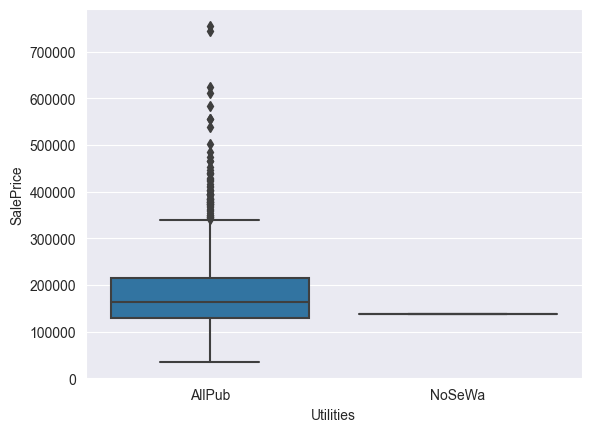

In [36]:
sns.boxplot(df, x="Utilities", y="SalePrice")

In [37]:
df["LotConfig"].nunique()

5

In [38]:
df["LotConfig"].value_counts(dropna=False, normalize=True)

LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64

<Axes: xlabel='LotConfig', ylabel='SalePrice'>

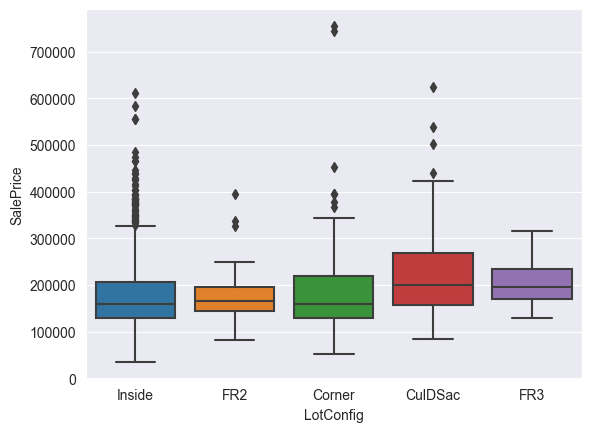

In [39]:
sns.boxplot(df, x="LotConfig", y="SalePrice")

In [40]:
df["LandSlope"].nunique()

3

In [41]:
df["LandSlope"].value_counts(dropna=False, normalize=True)

LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64

<Axes: xlabel='LandSlope', ylabel='SalePrice'>

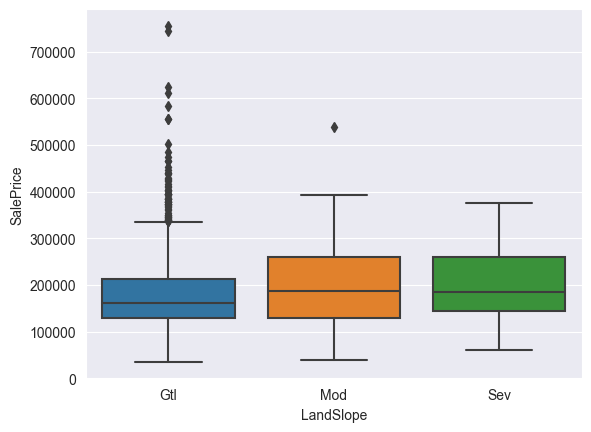

In [42]:
sns.boxplot(df, x="LandSlope", y="SalePrice")

In [43]:
df["Neighborhood"].nunique()

25

In [44]:
df["Neighborhood"].value_counts(dropna=False, normalize=True)

Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.033562
NoRidge    0.028082
Timber     0.026027
IDOTRR     0.025342
ClearCr    0.019178
StoneBr    0.017123
SWISU      0.017123
MeadowV    0.011644
Blmngtn    0.011644
BrDale     0.010959
Veenker    0.007534
NPkVill    0.006164
Blueste    0.001370
Name: proportion, dtype: float64

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

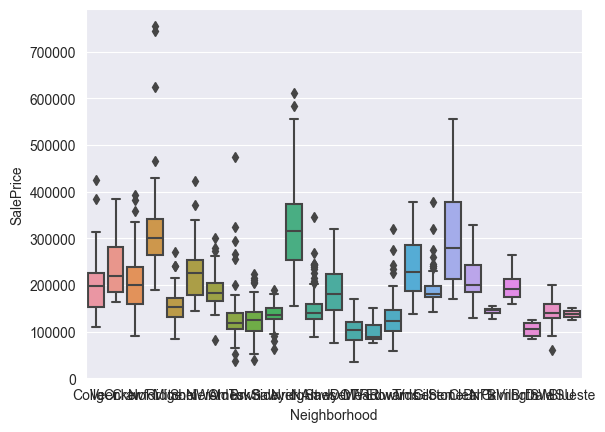

In [45]:
sns.boxplot(df, x="Neighborhood", y="SalePrice")

<Axes: xlabel='OrderedNeighborhoods', ylabel='SalePrice'>

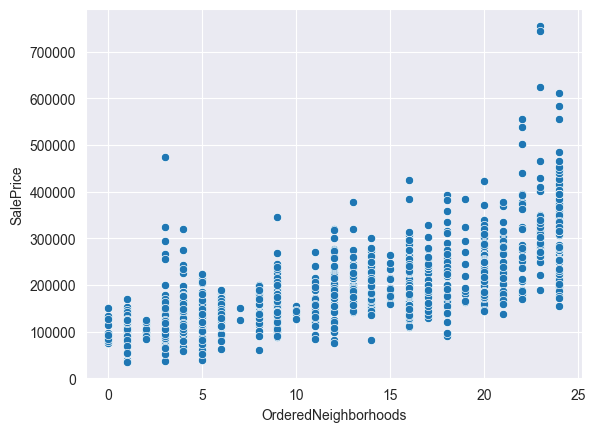

In [79]:
neighborhoods = df.groupby("Neighborhood").SalePrice.median().sort_values().index
neighborhoods_to_order = {n: o for o, n in enumerate(neighborhoods, start=0)}

df["OrderedNeighborhoods"] = df.Neighborhood.map(neighborhoods_to_order)

sns.scatterplot(df, x="OrderedNeighborhoods", y="SalePrice")

In [46]:
df["Condition1"].value_counts(dropna=False, normalize=True)

Condition1
Norm      0.863014
Feedr     0.055479
Artery    0.032877
RRAn      0.017808
PosN      0.013014
RRAe      0.007534
PosA      0.005479
RRNn      0.003425
RRNe      0.001370
Name: proportion, dtype: float64

<Axes: xlabel='Condition1', ylabel='SalePrice'>

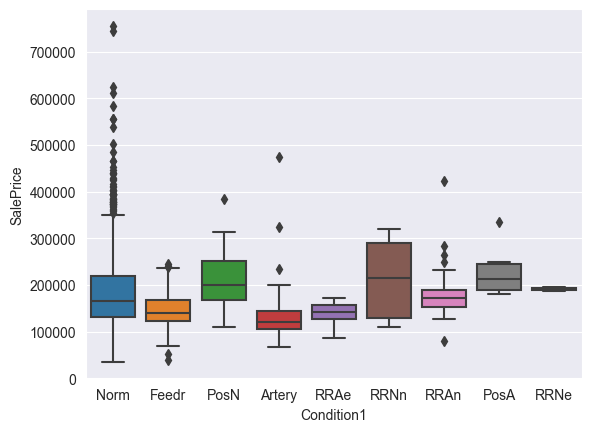

In [47]:
sns.boxplot(df, x="Condition1", y="SalePrice")

In [48]:
df["Condition2"].value_counts(dropna=False, normalize=True)

Condition2
Norm      0.989726
Feedr     0.004110
Artery    0.001370
RRNn      0.001370
PosN      0.001370
PosA      0.000685
RRAn      0.000685
RRAe      0.000685
Name: proportion, dtype: float64

<Axes: xlabel='Condition2', ylabel='SalePrice'>

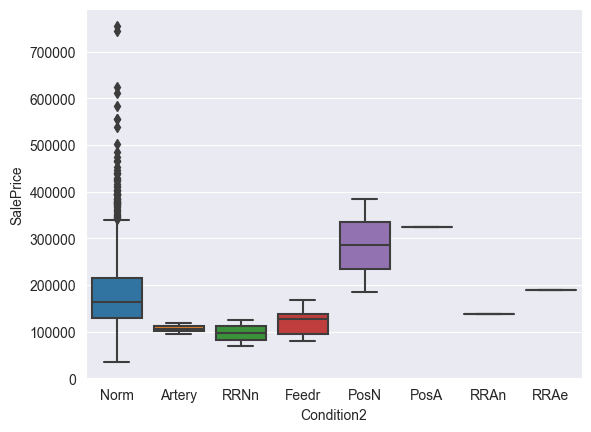

In [49]:
sns.boxplot(df, x="Condition2", y="SalePrice")

In [50]:
df["BldgType"].value_counts(dropna=False, normalize=True)

BldgType
1Fam      0.835616
TwnhsE    0.078082
Duplex    0.035616
Twnhs     0.029452
2fmCon    0.021233
Name: proportion, dtype: float64

<Axes: xlabel='BldgType', ylabel='SalePrice'>

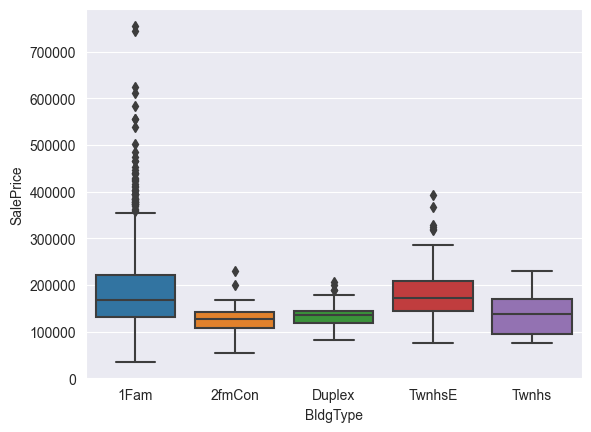

In [51]:
sns.boxplot(df, x="BldgType", y="SalePrice")

In [52]:
df["HouseStyle"].value_counts(dropna=False, normalize=True)

HouseStyle
1Story    0.497260
2Story    0.304795
1.5Fin    0.105479
SLvl      0.044521
SFoyer    0.025342
1.5Unf    0.009589
2.5Unf    0.007534
2.5Fin    0.005479
Name: proportion, dtype: float64

<Axes: xlabel='HouseStyle', ylabel='SalePrice'>

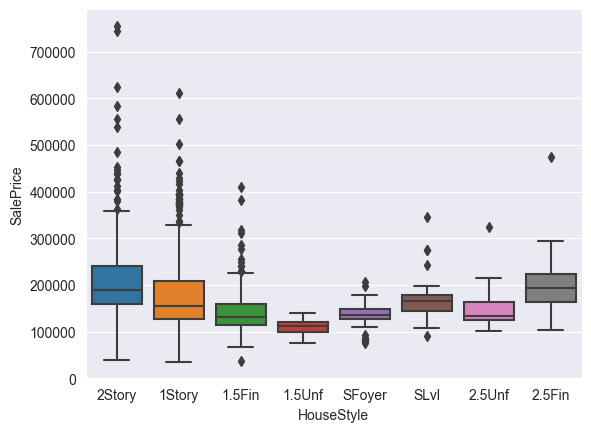

In [53]:
sns.boxplot(df, x="HouseStyle", y="SalePrice")

In [80]:
df["OverallQual"].value_counts()

OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64

In [81]:
df["OverallQual"].nunique()

10

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

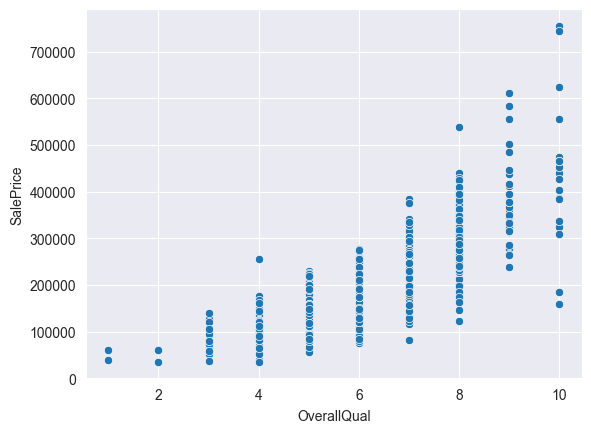

In [82]:
sns.scatterplot(df, x="OverallQual", y="SalePrice")

In [ ]:
# OverallCond

In [85]:
df["OverallCond"].value_counts()

OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64

In [86]:
df["OverallCond"].nunique()

9

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

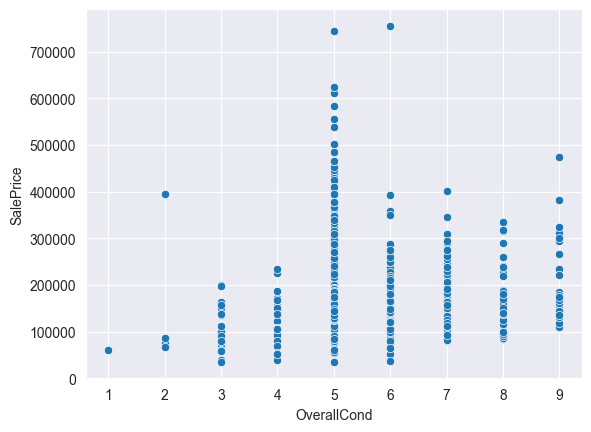

In [87]:
sns.scatterplot(df, x="OverallCond", y="SalePrice")

<Axes: xlabel='OverallCond', ylabel='Count'>

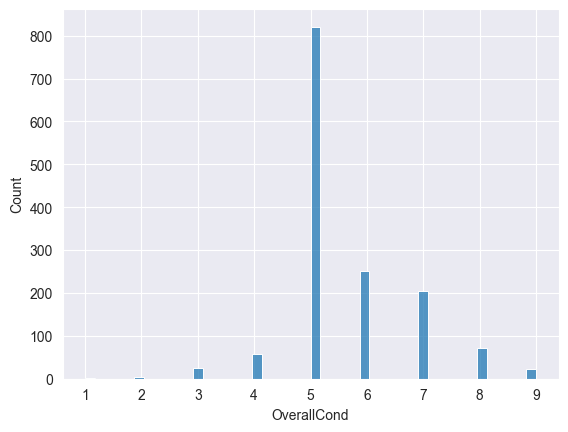

In [88]:
sns.histplot(df, x="OverallCond")

In [89]:
df["YearBuilt"].value_counts()

YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: count, Length: 112, dtype: int64

In [90]:
df["YearBuilt"].nunique()

112

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

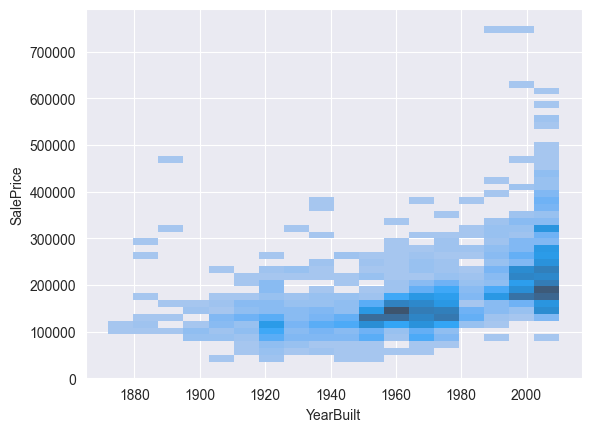

In [98]:
sns.histplot(df, x="YearBuilt", y="SalePrice")

In [122]:
df["YearRemodAdd"].nunique()

61

<Axes: xlabel='YearRemodAdd', ylabel='Count'>

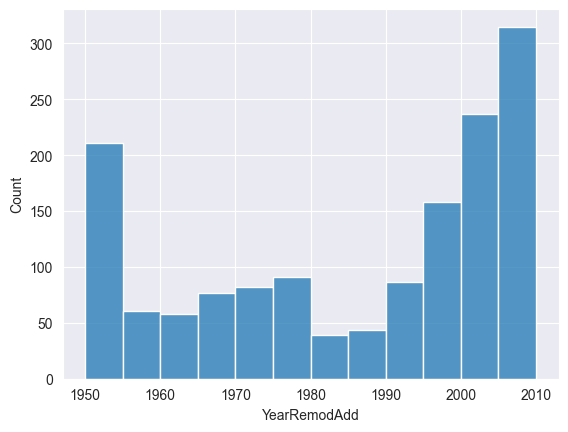

In [124]:
sns.histplot(df, x="YearRemodAdd")

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

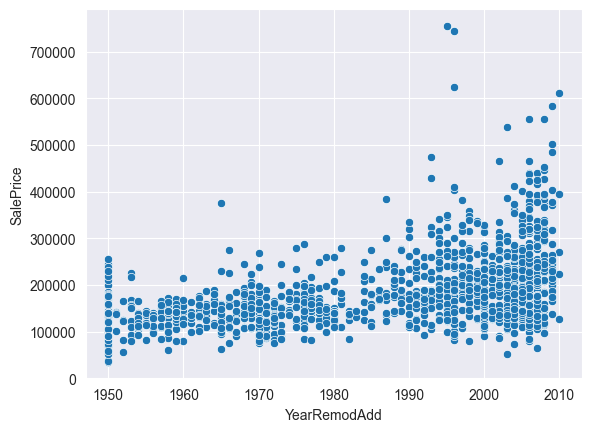

In [126]:
sns.scatterplot(df, x="YearRemodAdd", y="SalePrice")

In [129]:
df[df["YearRemodAdd"] == 1950].isna().mean()

MSSubClass              0.000000
MSZoning                0.000000
LotFrontage             0.106742
LotArea                 0.000000
Street                  0.000000
                          ...   
YrSold                  0.000000
SaleType                0.000000
SaleCondition           0.000000
SalePrice               0.000000
OrderedNeighborhoods    0.000000
Length: 81, dtype: float64

In [ ]:
# RoofStyle

In [130]:
df["RoofStyle"].nunique()

6

In [132]:
df["RoofStyle"].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

<Axes: xlabel='RoofStyle', ylabel='SalePrice'>

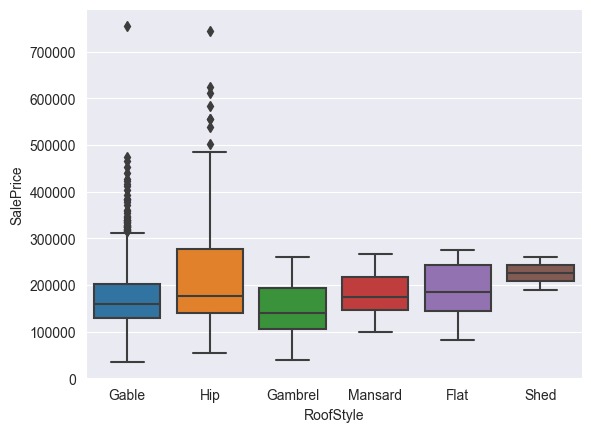

In [134]:
sns.boxplot(df, x="RoofStyle", y="SalePrice")

In [135]:
df["RoofMatl"].nunique()

8

In [137]:
df["RoofMatl"].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

<Axes: xlabel='RoofMatl', ylabel='Count'>

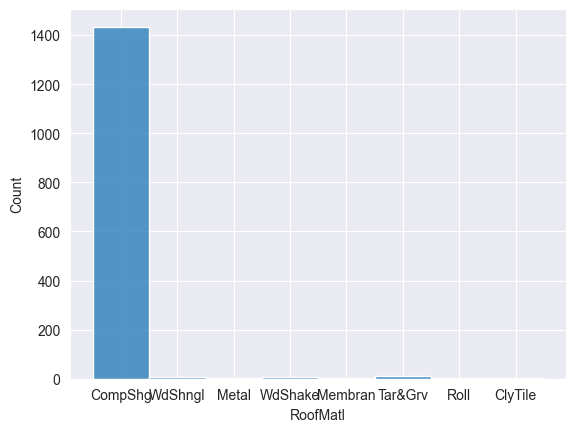

In [136]:
sns.histplot(df, x="RoofMatl")

In [138]:
df["Exterior1st"].nunique()

15

In [139]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

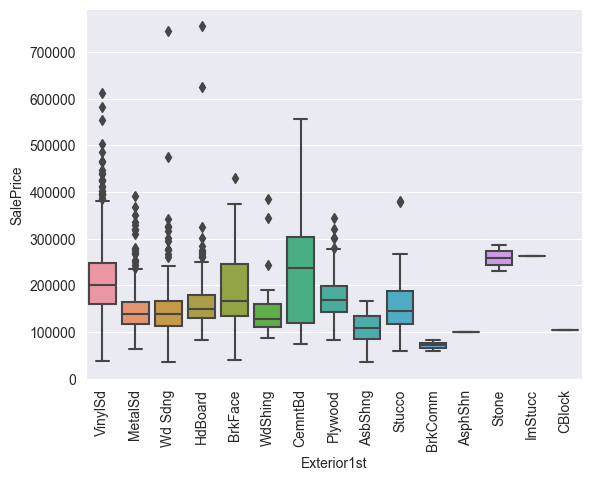

In [143]:
sns.boxplot(df, x="Exterior1st", y="SalePrice")
plt.xticks(rotation=90)
None

In [144]:
df["Exterior2nd"].nunique()

16

In [145]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

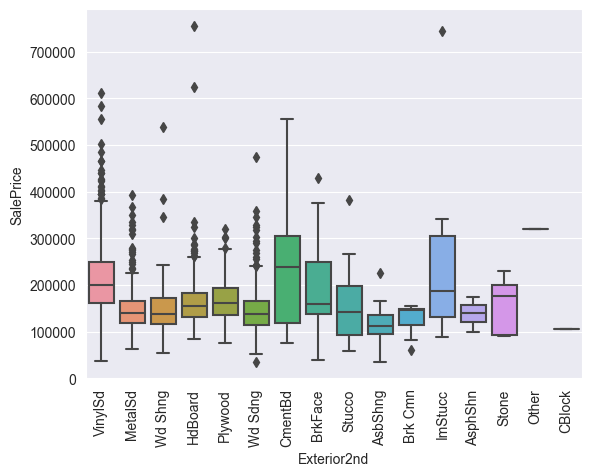

In [148]:
sns.boxplot(df, x="Exterior2nd", y="SalePrice")
plt.xticks(rotation=90)
None

In [167]:
df.reset_index().groupby(["Exterior1st", "Exterior2nd"]).agg({"SalePrice": ["count", "median", "min", "max", "std"]})

SalePrice                                        
                            count    median     min     max           std
Exterior1st Exterior2nd                                                  
AsbShng     AsbShng            17  110000.0   35311  165500  35501.347672
            Plywood             2  104500.0   82000  127000  31819.805153
            Stucco              1   87000.0   87000   87000           NaN
AsphShn     AsphShn             1  100000.0  100000  100000           NaN
BrkComm     Brk Cmn             2   71000.0   60000   82000  15556.349186
...                           ...       ...     ...     ...           ...
WdShing     HdBoard             2  142950.0  133900  152000  12798.632739
            Plywood             5  134432.0  115000  190000  28881.248671
            Stucco              1   90350.0   90350   90350           NaN
            Wd Sdng             1   87000.0   87000   87000           NaN
            Wd Shng            17  120000.0   98000  385000  85680.763079

[67 rows x 5 columns]

In [171]:
df["MasVnrType"].value_counts(dropna=False)

MasVnrType
NaN        872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

<Axes: xlabel='MasVnrType', ylabel='SalePrice'>

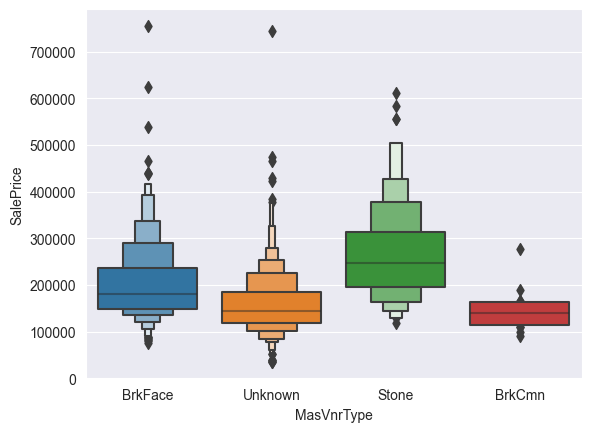

In [173]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
sns.boxenplot(df, x="MasVnrType", y="SalePrice")

In [188]:
df["MasVnrArea"].value_counts(dropna=False)

MasVnrArea
0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: count, Length: 328, dtype: int64

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

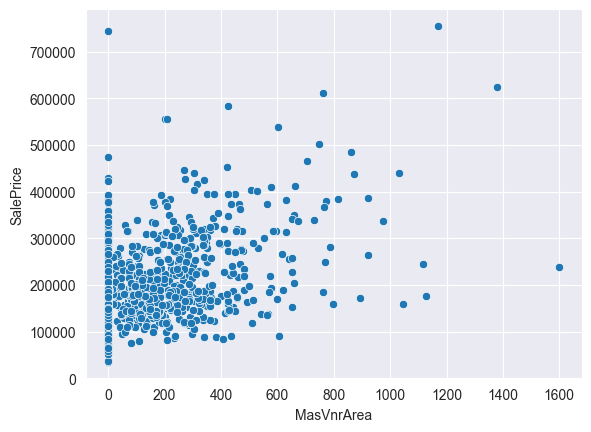

In [201]:
sns.scatterplot(df, x="MasVnrArea", y="SalePrice")

In [202]:
df[df["MasVnrArea"] == 0].shape

(861, 81)

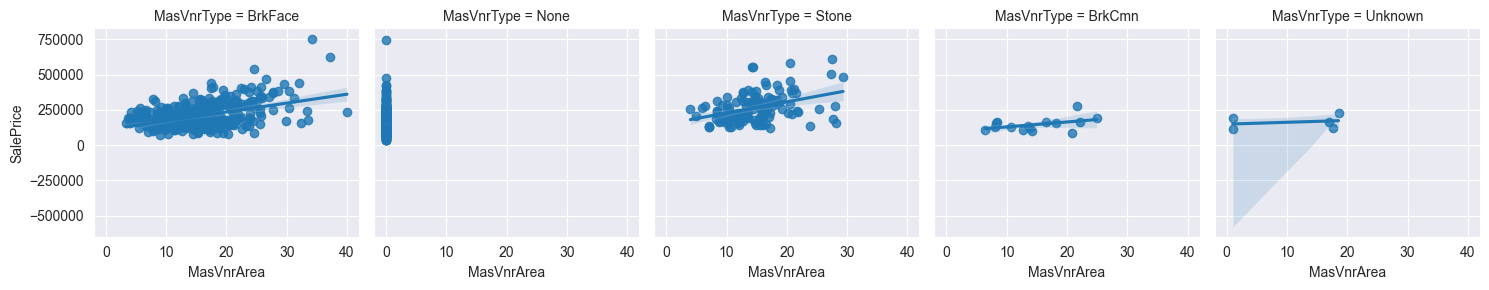

In [229]:

data = df.copy()
data["MasVnrType"] = data.apply(lambda x: "None" if x.MasVnrArea == 0 else x.MasVnrType, axis=1)
data["MasVnrArea"] = np.sqrt(data["MasVnrArea"])
facet = sns.FacetGrid(data=data, dropna=False, col="MasVnrType")
facet.map_dataframe(sns.regplot, x="MasVnrArea", y="SalePrice")


In [231]:
df["ExterQual"].value_counts(dropna=False)

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

<Axes: xlabel='ExterQual', ylabel='SalePrice'>

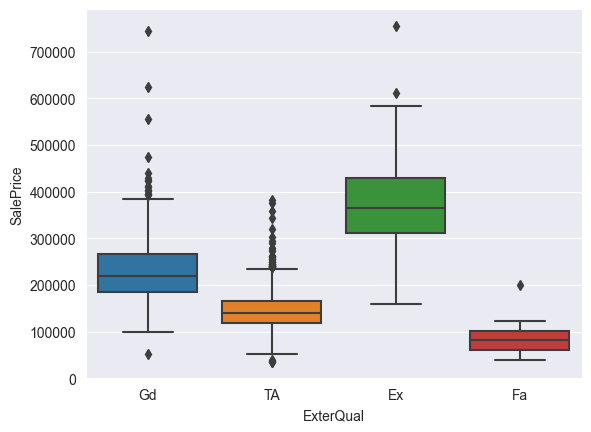

In [232]:
sns.boxplot(df, x="ExterQual", y="SalePrice")

In [233]:
df["ExterCond"].value_counts(dropna=False)

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

<Axes: xlabel='ExterCond', ylabel='SalePrice'>

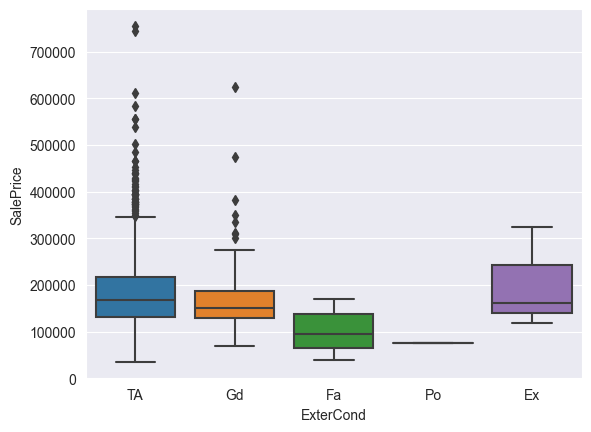

In [234]:
sns.boxplot(df, x="ExterCond", y="SalePrice")

<Axes: ylabel='SalePrice'>

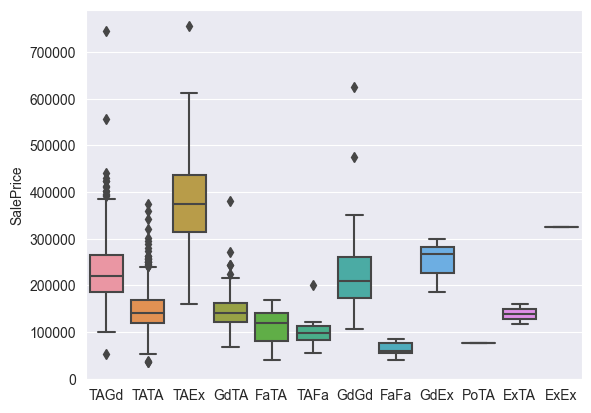

In [252]:
sns.boxplot(x=df.apply(lambda r: f"{r.ExterCond}{r.ExterQual}", axis=1), y=df.SalePrice)

<Axes: ylabel='Count'>

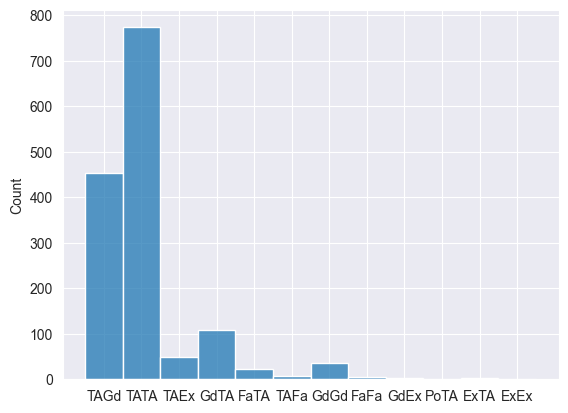

In [253]:
sns.histplot(x=df.apply(lambda r: f"{r.ExterCond}{r.ExterQual}", axis=1))

In [254]:
df["Foundation"].value_counts(dropna=False)

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

<Axes: xlabel='Foundation', ylabel='SalePrice'>

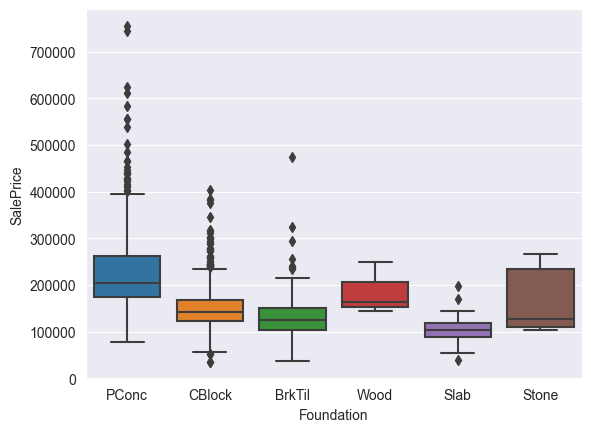

In [255]:
sns.boxplot(df, x="Foundation", y="SalePrice")

In [ ]:
# BsmtFullBath

In [256]:
df["BsmtFullBath"].value_counts(dropna=False)

BsmtFullBath
0    856
1    588
2     15
3      1
Name: count, dtype: int64

<Axes: xlabel='BsmtFullBath', ylabel='SalePrice'>

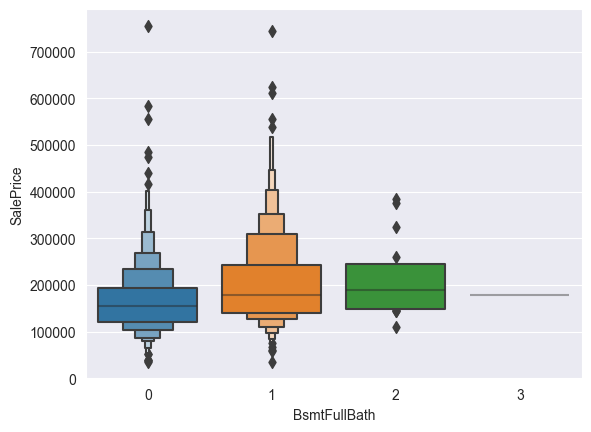

In [257]:
sns.boxenplot(df, x="BsmtFullBath", y="SalePrice")

In [4]:
cats = df.select_dtypes(include="object").columns
numerical = df.select_dtypes(exclude="object").columns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

oe = OrdinalEncoder()
ct = ColumnTransformer(transformers=[("cats", oe, cats)], remainder="passthrough")
pipe = make_pipeline(ct)

pipe.set_output(transform="pandas")
results = pipe.fit_transform(df.drop("SalePrice", axis=1)).fillna(-999)

pd.DataFrame({"mi": mutual_info_regression(results, df["SalePrice"]), "col": pipe.get_feature_names_out()}).sort_values(by="mi", ascending=False)

,mi,col
46,0.568597,remainder__OverallQual
8,0.513588,cats__Neighborhood
58,0.480974,remainder__GrLivArea
54,0.365936,remainder__TotalBsmtSF
69,0.365782,remainder__GarageArea
...,...,...
38,0.000000,cats__PoolQC
14,0.000000,cats__RoofMatl
5,0.000000,cats__Utilities
77,0.000000,remainder__MoSold
